In [7]:
# Import packages
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ddpg import DDPGAgent

In [8]:
# Parameters
num_episodes = 5000
batch_size = 32
memory_size = 200_000
gamma = 0.99
learning_rate = 0.0005
tau = 0.005
exploration_sd = 0.15
save_freq = 200

In [9]:
# Train
env = gym.make("InvertedDoublePendulum-v4")
state_size = env.observation_space.shape[0]

agent = DDPGAgent(state_size=state_size,
                         gamma=gamma,
                         learning_rate=learning_rate,
                         tau=tau,
                         exploration_sd=exploration_sd,
                         memory_size=memory_size)

agent.train(env, num_episodes, save_freq=save_freq, batch_size=batch_size)

Episode 1/5000 | Return: 80.42 | Steps: 11| Memory: 11 | Time: 0.00 seconds | Cart Position: -0.50
Episode 2/5000 | Return: 81.96 | Steps: 11| Memory: 22 | Time: 0.00 seconds | Cart Position: -0.12
Episode 3/5000 | Return: 50.93 | Steps: 8| Memory: 30 | Time: 0.00 seconds | Cart Position: -0.53
Episode 4/5000 | Return: 43.45 | Steps: 7| Memory: 37 | Time: 0.20 seconds | Cart Position: -0.41
Episode 5/5000 | Return: 52.83 | Steps: 8| Memory: 45 | Time: 0.33 seconds | Cart Position: -0.39
Episode 6/5000 | Return: 62.21 | Steps: 9| Memory: 54 | Time: 0.43 seconds | Cart Position: -0.32
Episode 7/5000 | Return: 54.57 | Steps: 8| Memory: 62 | Time: 0.32 seconds | Cart Position: -0.09
Episode 8/5000 | Return: 42.00 | Steps: 7| Memory: 69 | Time: 0.26 seconds | Cart Position: -0.49
Episode 9/5000 | Return: 34.39 | Steps: 6| Memory: 75 | Time: 0.22 seconds | Cart Position: -0.39
Episode 10/5000 | Return: 35.31 | Steps: 6| Memory: 81 | Time: 0.22 seconds | Cart Position: -0.33
Episode 11/5000 |

In [13]:
returns = agent.training_returns
steps = agent.training_steps
training_time = agent.training_time
print(f'Average return last 100 episodes: {np.mean(returns[-100: ]):.2f}')
print(f'Average step reached last 100 episodes: {np.mean(steps[-100: ]):.2f}')

Average return last 100 episodes: 4348.01
Average step reached last 100 episodes: 554.61


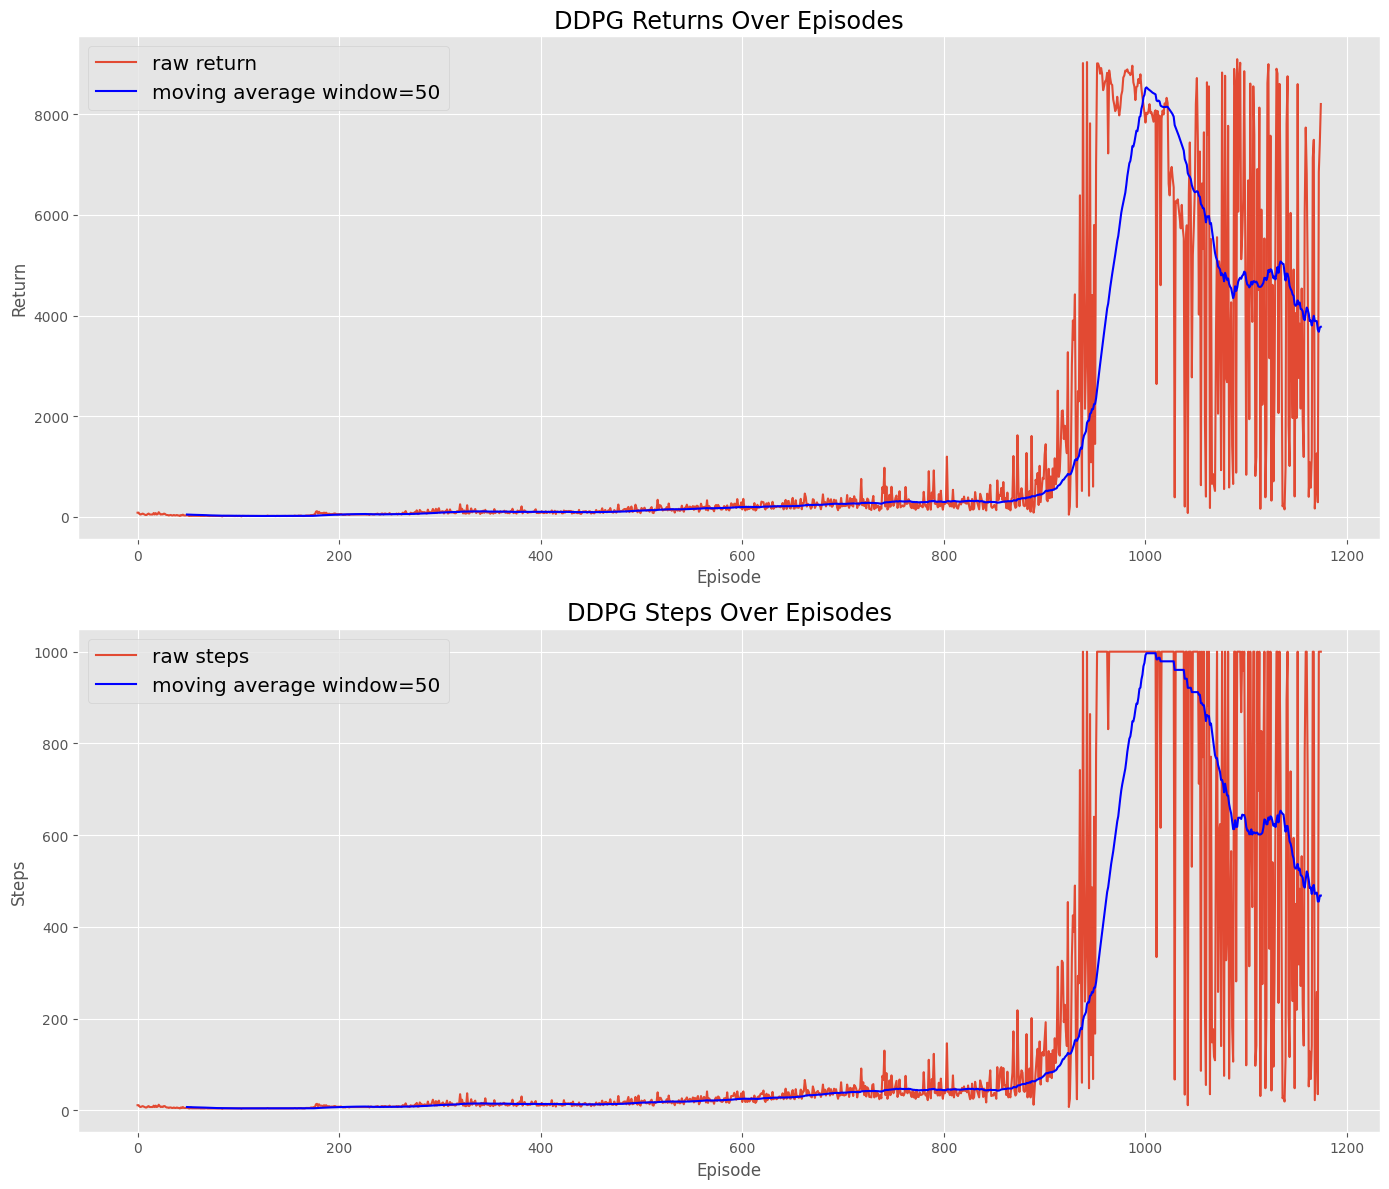

In [14]:
plt.style.use('ggplot')
ma_window = 50
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

# Plot 1
ax1.plot(returns, label='raw return')
ax1.plot(pd.Series(returns).rolling(ma_window).mean(), label=f'moving average window={ma_window}', color='blue')
ax1.set_title('DDPG Returns Over Episodes', fontsize='xx-large')
ax1.set_xlabel('Episode')
ax1.legend(fontsize='x-large')
ax1.set_ylabel('Return')

# Plot 2
ax2.plot(steps, label='raw steps')
ax2.plot(pd.Series(steps).rolling(ma_window).mean(), label=f'moving average window={ma_window}', color='blue')
ax2.set_title('DDPG Steps Over Episodes', fontsize='xx-large')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Steps')
ax2.legend(fontsize='x-large')

plt.show()

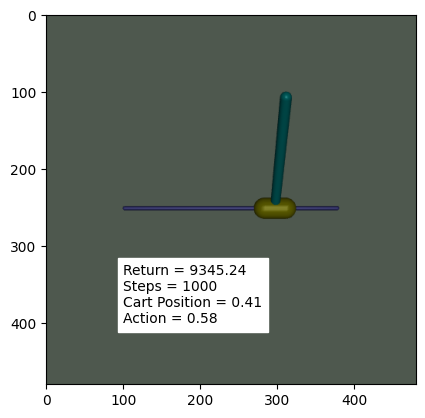

(9345.237226621384, 1000)

In [15]:
plt.style.use('default')
environment = gym.make('InvertedDoublePendulum-v4', render_mode='rgb_array')
agent.generate_greedy_episode(environment, render=True)